In [4]:
from IPython.display import  Image, display
from langchain_openai import ChatOpenAI
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_community.utilities import WikipediaAPIWrapper 
from langchain_community.tools import WikipediaQueryRun
from langgraph.prebuilt import create_react_agent
from langgraph.prebuilt import ToolNode, tools_condition
from dotenv import load_dotenv
from IPython.display import  Image, display
import os
load_dotenv()

True

In [2]:
# LLM Setup 
model = ChatOpenAI(openai_api_key=os.getenv('OPENAI_API_KEY'), model="gpt-4o-mini-2024-07-18")

In [3]:
# Define the State
class State(TypedDict):
    
    # Define messages with metadata
    messages: Annotated[list, add_messages]

In [19]:
# Initialize Wikipedia API wrapper to fetch top 1 result 
api_wrapper = WikipediaAPIWrapper(top_k_results=1)    
# Create a Wikipedia query tool using the API wrapper 
wikipedia_tool = WikipediaQueryRun(api_wrapper=api_wrapper)  
tools = [wikipedia_tool]

In [20]:
model_with_tools = model.bind_tools(tools)

In [21]:
def search_agent(state: State):
    return {"messages": [model_with_tools.invoke(state["messages"])]}

In [32]:
# Initialize StateGraph
graph_builder = StateGraph(State)

# Add chatbot node to the graph
graph_builder.add_node("Search Agent", search_agent)
tool_node = ToolNode(tools=[wikipedia_tool])
graph_builder.add_node("tools", tool_node)


# Define the start and end of the conversation flow
graph_builder.add_edge(START, "Search Agent")
graph_builder.add_edge("tools", "Search Agent")
graph_builder.add_conditional_edges("Search Agent", tools_condition)
graph_builder.add_edge("Search Agent", END)

# Compile the graph to prepare for execution
graph = graph_builder.compile()

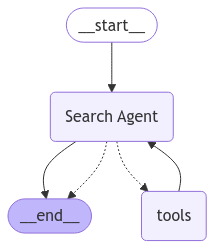

In [33]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
# Define a function to execute the chatbot based on user input
def stream_graph_updates(user_input: str):
    
    # Start streaming events from the graph with the user's input
    for event in graph.stream({"messages": [("user", user_input)]}):
        
        # Retrieve and print the chatbot node responses
        for item in event.values():
            print("Agent:", item["messages"])

In [36]:
stream_graph_updates("Brasil")

Agent: [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jh2urDMqQFj7s6E3QgIYDAC4', 'function': {'arguments': '{"query":"Brasil"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 82, 'total_tokens': 95, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0aa8d3e20b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-85b9ac11-8a9f-44e8-bd4d-dfbc79460649-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Brasil'}, 'id': 'call_jh2urDMqQFj7s6E3QgIYDAC4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 82, 'output_tokens': 13, 'total_tokens': 95, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoni

## Estudar essa biblioteca

In [2]:
import yfinance as yf
dat = yf.Ticker("HGLG11.SA")

In [18]:
data = dat.history(start="2025-01-01", end="2025-01-10")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-02 00:00:00-03:00,155.600006,155.759995,154.190002,154.639999,42648,1.1,0.0
2025-01-03 00:00:00-03:00,154.639999,156.130005,154.000000,154.000000,51914,0.0,0.0


In [24]:
#
dat = yf.Ticker("HGLG11.SA")
data = dat.history(start="2024-10-01", end="2025-01-10", interval ='1mo').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-10-01 00:00:00-03:00,153.886277,154.450071,149.521752,151.495026,1199919,1.1,0.0
1,2024-11-01 00:00:00-03:00,151.120452,152.696358,148.046949,149.025772,1024759,1.1,0.0
2,2024-12-01 00:00:00-03:00,149.641481,155.033701,139.980829,153.909912,1296618,1.1,0.0
3,2025-01-01 00:00:00-03:00,155.600006,156.130005,0.000000,154.000000,94511,1.1,0.0


In [13]:
res = dat.info

In [17]:
# Obtém o dividendo anual e o Dividend Yield anual
dividendo_anual = res.get("dividendRate", 0)
dy_anual = res.get("dividendYield", 0)

# Converte para valores mensais (caso deseje uma estimativa mensal)
dividendo_mensal = dividendo_anual / 12
dy_mensal = dy_anual / 12

print("Dividendo anual (R$):", dividendo_anual)
print("Dividend Yield anual:", dy_anual)
print("Dividendo mensal estimado (R$):", dividendo_mensal)
print("Dividend Yield mensal estimado:", dy_mensal)


Dividendo anual (R$): 13.2
Dividend Yield anual: 0.08140001
Dividendo mensal estimado (R$): 1.0999999999999999
Dividend Yield mensal estimado: 0.006783334166666666


In [16]:
res

{'address1': 'Avenida Presidente Juscelino; Torre IV - 7º andar - Itaim Bibi',
 'address2': 'Kubitschek',
 'city': 'Sao Paulo',
 'state': 'SP',
 'zip': '1830',
 'country': 'Brazil',
 'website': 'https://www.cshg.com.br/site/publico/imob/imob.seam',
 'industry': 'REIT - Diversified',
 'industryKey': 'reit-diversified',
 'industryDisp': 'REIT - Diversified',
 'sector': 'Real Estate',
 'sectorKey': 'real-estate',
 'sectorDisp': 'Real Estate',
 'longBusinessSummary': 'Cshg Logistica - Fundo De Investimento Imobiliario specializes in real estate investments.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 154.64,
 'regularMarketPreviousClose': 154.64,
 'dividendRate': 13.2,
 'dividendYield': 0.08140001,
 'exDividendDate': 1717372800,
 'payoutRatio': 0.83489996,
 'beta': 0.328,
 'trailingPE': 9.4944515,
 'averageVolume': 56701,
 'averageVolume10days': 47352,
 'averageDailyVolume10Day': 47352,
 'bid': 154.0,
 'ask': 155.0,
 'marketCap': 5203290624,
 'fiftyTwoWeekHigh': 170.71,
 'priceT

In [11]:
res.get("dividendRate", 0)

13.2

In [12]:
res

{'address1': 'Avenida Presidente Juscelino; Torre IV - 7º andar - Itaim Bibi',
 'address2': 'Kubitschek',
 'city': 'Sao Paulo',
 'state': 'SP',
 'zip': '1830',
 'country': 'Brazil',
 'website': 'https://www.cshg.com.br/site/publico/imob/imob.seam',
 'industry': 'REIT - Diversified',
 'industryKey': 'reit-diversified',
 'industryDisp': 'REIT - Diversified',
 'sector': 'Real Estate',
 'sectorKey': 'real-estate',
 'sectorDisp': 'Real Estate',
 'longBusinessSummary': 'Cshg Logistica - Fundo De Investimento Imobiliario specializes in real estate investments.',
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 154.64,
 'regularMarketPreviousClose': 154.64,
 'dividendRate': 13.2,
 'dividendYield': 0.08140001,
 'exDividendDate': 1717372800,
 'payoutRatio': 0.83489996,
 'beta': 0.328,
 'trailingPE': 9.4944515,
 'averageVolume': 56701,
 'averageVolume10days': 47352,
 'averageDailyVolume10Day': 47352,
 'bid': 154.01,
 'ask': 154.98,
 'marketCap': 5203290624,
 'fiftyTwoWeekHigh': 170.71,
 'pric

In [11]:
res["currentPrice"]

154.0

In [3]:
res["currentPrice"] / res["bookValue"]

0.9732114080599599